<a href="https://colab.research.google.com/github/Rachita-G/Python_Practice/blob/main/Models/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGISTIC REGRESSION

* logistic regression predicts the probability of an event occuring.
* it is called logistic as we fir logistic curve in the plot to predict the unforseen value. Lie b/w 0 n  1

**Linear regression model:**
$ Y=1+b1x1+b2x2+.....+bkxk $

**Logistic regression model:**
$ P(x)= \frac{e^(1+b1x1+b2x2+.....+bkxk)}{1+e^(1+b1x1+b2x2+.....+bkxk)} $

**Logit regression model:**
$ \frac{P(x)}{1-P(x)}= e^(1+b1x1+b2x2+.....+bkxk)$

Lhs of logit function is called odds= $p(event)/p(1-event)$

thus log(odds)=1+b1x1+b2x2+.....+bkxk now.

# ODDS VS LOG ODDS

odds = prob of something happening/prob of something not happening ex: odds (winning)=1/2 ie , one out of 3 matches

taking the odds as described above will give non symmetric values.
If odds(winning) is more when nmerator is large tends to infinity and thus odds value tend to infinity
If odds(winning) is less then denominator is less tending to infinity and thus odds tend to 0 
hence, it is evident that the odds value is assymnetric in nature
but taking log of odds gives a perfect symmetric scale as log(inf)= inf and log(0)= - infi 
thus, its value ranges from - inf to inf hence symmetric.
**log(odds) is also called the logit function**

# ODDS RATIO AND LOG ODDS RATIO
odds!= odds ratio

odds ratio is the ratio of the odds. ex: odss ratio = odds of x happening/ odds of y happening.
like odds , odds ratio is assymetric and log(odds ratio) is symmetric. log(odds ratio) when plotted gives a nrml distribution  with most values between -3 and 3. log(odds ratio) is used to predict if the indep variable is a good predictor in predicting the target variable. the larger the value of the predictor, the better the predictor. 


### 1. SAT and Admitted Dataset

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
raw_data = pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\SAT and Admittance - Logistic R.csv')
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [ ]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [ ]:
y=data['Admitted']
x1=data['SAT']

In [ ]:
x=sm.add_constant(x1)
reg_log=sm.Logit(y,x).fit() # as we used sm.OLS in regression
reg_log # max no of iterations is 35 in logistic fucntion here in sm.function value is optimal objective value

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [ ]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.7992
Time:                        13:36:21   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

 # VISUALIZATIONS

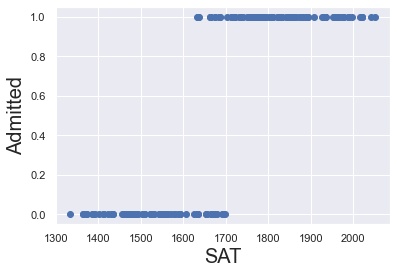

In [ ]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

In [ ]:
# plotting with regression line
x=sm.add_constant(x1)
reg=sm.OLS(y,x).fit()

In [ ]:
reg.params

const   -3.251859
SAT      0.002248
dtype: float64

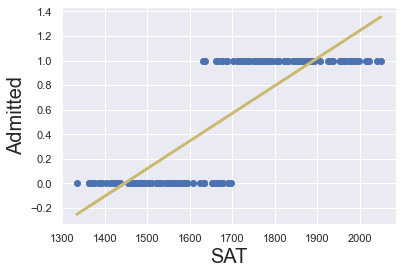

In [ ]:
plt.scatter(x1,y)
y_hat = x1*reg.params[1]+reg.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

In [ ]:
# defining logistic function
def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [ ]:
f_sorted=np.sort(f(x1,reg_log.params[0],reg_log.params[1])) # logistic function sorted
x_sorted=np.sort(np.array(x1)) # making dataframe x1 to array and sorting in ascending order

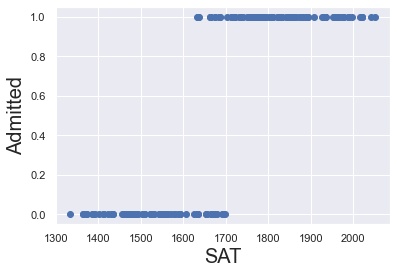

In [ ]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

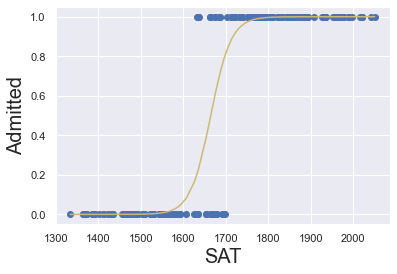

In [ ]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

### 2. SAT, Admitted and Gender Dataset

In [ ]:
raw_data3=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\SAT Admitted, Gender - Logistic R.csv")
raw_data3.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [ ]:
data3=raw_data3.copy()
data3['Admitted'] = data3['Admitted'].map({'Yes': 1, 'No': 0})
data3['Gender'] = data3['Gender'].map({'Female': 1, 'Male': 0})
data3.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [ ]:
y = data3['Admitted']
x1 = data3['Gender']
x=sm.add_constant(x1)
reg_log3g=sm.Logit(y,x).fit()
reg_log3g.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.1659
Time:                        13:55:26   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [ ]:
y = data3['Admitted']
x1 = data3[['SAT','Gender']]
x=sm.add_constant(x1)
reg_log3=sm.Logit(y,x).fit()
reg_log3.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.8249
Time:                        13:55:58   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Comparing the regression with only gender, log likelihood is bigger with SAT, hence it is good estimator and also see the pvalues for each variable.

In [ ]:
np.exp(1.9449)

6.992932526814459

**INTERPRETATION:** Given the same SAT score,female has 7 times higher odds than male to get admited 
since, female==1 and male==0

In [ ]:
# This is a method to change the formatting of np arrays
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
reg_log3.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [ ]:
# An array containing the TRUE (actual) values
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [ ]:
# A prediction table (confusion matrix) showing the 
reg_log3.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [ ]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(reg_log3.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [ ]:
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df)
cm

array([[69.00, 5.00],
       [4.00, 90.00]])

In [ ]:
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

In [ ]:
test_data=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\SAT Admitted, Gender - test data Logistic R.csv")
test_data.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [ ]:
test_data['Admitted']=test_data['Admitted'].map({'Yes':1,'No':0})
test_data['Gender']=test_data['Gender'].map({'Female':1,'Male':0})

In [ ]:
test_data.head()

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0


In [ ]:
data3.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [ ]:
x.head() # we need the test data the same way

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0


In [ ]:
# Get the actual values (true valies ; targets)
test_actual = test_data['Admitted']
# Prepare the test data to be predicted
testing_data = sm.add_constant(test_data.drop(['Admitted'],axis=1))
testing_data.head()

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0


In [ ]:
test_actual.shape

(19,)

In [ ]:
testing_data.shape

(19, 3)

In [ ]:
reg_log3.predict(testing_data)

0     4.416867e-07
1     9.742731e-01
2     9.941557e-01
3     9.781306e-01
4     3.215089e-01
5     3.814192e-02
6     9.797226e-01
7     9.991287e-01
8     9.999936e-01
9     7.308682e-01
10    9.999987e-01
11    9.999999e-01
12    8.638537e-01
13    6.007566e-05
14    8.493951e-01
15    9.999426e-01
16    3.173552e-04
17    4.065056e-03
18    9.998485e-01
dtype: float64

In [ ]:
# Check the missclassification rate
# Note that Accuracy + Missclassification rate = 1 = 100%
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684


### 2. Bank data

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

In [ ]:
# see another dataset
data1=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\Example_bank_data.csv")
data1.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [ ]:
data1=data1.drop(['Unnamed: 0'],axis=1)

In [ ]:
data1.columns

Index(['duration', 'y'], dtype='object')

In [ ]:
# creating dummies for dep variable y
data1['y']=data1['y'].map({'yes':1,'no':0})
data1.head()

,duration,y
0,117,0
1,274,1
2,167,0
3,686,1
4,157,0


In [ ]:
data1.describe()

,duration,y
count,518.000000,518.000000
mean,382.177606,0.500000
std,344.295990,0.500483
min,9.000000,0.000000
25%,155.000000,0.000000
50%,266.500000,0.500000
75%,482.750000,1.000000
max,2653.000000,1.000000


In [ ]:
y=data1['y']
x1=data1['duration']
x=sm.add_constant(x1)
reg_log1=sm.Logit(y,x).fit()
reg_log1

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [ ]:
reg_log1.params

const      -1.700110
duration    0.005112
dtype: float64

In [ ]:
reg_log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.2121
Time:                        13:38:43   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

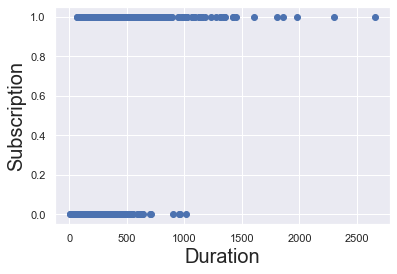

In [ ]:
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Subscription',fontsize=20)
plt.show()

In [ ]:
f_sorted=np.sort(f(x1,reg_log1.params[0],reg_log1.params[1])) # logistic function sorted
x_sorted=np.sort(np.array(x1)) # making dataframe x1 to array and sorting in ascending order

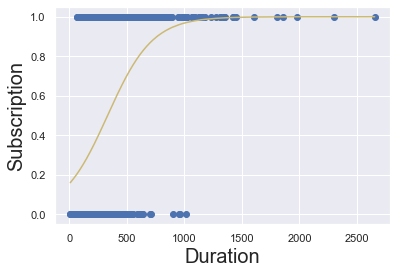

In [ ]:
plt.scatter(x1,y,color='C0')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('Subscription',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

**NOTE:** if the summary for reg_log gives an error then import a library as:
     ( this part not be needed after the latests updates of the library )

from scipy import stats

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Explaining summary of logistic regression model

**Likelihood function:** a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables. The bigger the likelihood function the higher the probability that our model is correct.

**MLE** tries to maximise the likelihood function. The computer goes through different values , until it finds a model, for which the likelihood is the highest. When it can no longer improve it, it will just stop the optimization.
 
**Log likelihood** is convinent to perform when using MLE. Thus , it is more imp. Note that the value of log likelihood is almost but not always negative.

**LL null:** it is the log likelihood function which has no explanatory variable. It is used as you may want to campare the likelihood of your model with LL null to see if your model has any explanatory power. 

Recall: In the regression model, we have f test to see the significance of each variable,. In logistic regression, we have:

**LLR p value** : It sess if our model is statistically different from LL null aka, useless model.

**Pseudo R squared:** It is a McFadden's R squared value. A good Pseudo R squared is somewhere between 0.2 and 0.4.
This measure is mostly useful for comparing the variations of the same model. Different models will have completely different and incomparible Pseudo R sqaures.

**LOGIT Function** : $ log(\frac{p(x)}{1-p(x)})=0.0051*duration-1.7001, p(x): prob of event occuring.

NOTE: for a unit change in variable, $delta(odds)=e^(bk) $

In [ ]:
# UNDERSTANDING LOGISTIC REGRESSION TABLES
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
raw_data2=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\Bank_data.csv")
raw_data2.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


**More information about the dataset:**

Note that <i> interest rate</i> indicates the 3-month interest rate between banks and <i> duration </i> indicates the time since the last contact was made with a given consumer. The <i> previous </i> variable shows whether the last marketing campaign was successful with this customer. The <i>March</i> and <i> May </i> are Boolean variables that account for when the call was made to the specific customer and <i> credit </i> shows if the customer has enough credit to avoid defaulting.

<i> Notes: 
    <li> the first column of the dataset is an index one; </li>
    <li> you don't need the graph for this exercise; </li>
    <li> the dataset used is much bigger </li>
</i>

In [ ]:
data2=raw_data2.copy()
data2=data2.drop(['Unnamed: 0','may'],axis=1) # if not march , its may!
data2.head()

,interest_rate,credit,march,previous,duration,y
0,1.334,0.0,1.0,0.0,117.0,no
1,0.767,0.0,0.0,1.0,274.0,yes
2,4.858,0.0,1.0,0.0,167.0,no
3,4.120,0.0,0.0,0.0,686.0,yes
4,4.856,0.0,1.0,0.0,157.0,no


In [ ]:
data2['y']=data2['y'].map({'yes':1,'no':0})
data2.head()

,interest_rate,credit,march,previous,duration,y
0,1.334,0.0,1.0,0.0,117.0,0
1,0.767,0.0,0.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,157.0,0


In [ ]:
x1=data2.drop(['y'],axis=1)
y=data2['y']

In [ ]:
x=sm.add_constant(x1)
reg_log2=sm.Logit(y.astype(float), x.astype(float)).fit()
reg_log2

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


In [ ]:
reg_log2.params

const           -0.021069
interest_rate   -0.800128
credit           2.358530
march           -1.832178
previous         1.536321
duration         0.006957
dtype: float64

In [ ]:
reg_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      512
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.5143
Time:                        13:42:20   Log-Likelihood:                -174.39
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 1.211e-77
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0211      0.311     -0.068      0.946      -0.631       0.589
interest_rate    -0.8001      0.089     -8.943      0.000      -0.975      -0.625
credit            2.3585      1.088      2.169      0.030       0.227       4.490
march            -1.8322      0.330     -5.556      0.000      -2.478      -1.186
previous          1.5363      0.501      3.067      0.002       0.554       2.518
duration          0.0070      0.001      9.381      0.000       0.006       0.008
=================================================================================
"""

In [ ]:
reg_log2.pred_table() # confusion matrix

array([[218.,  41.],
       [ 30., 229.]])

In [ ]:
cm=pd.DataFrame(reg_log2.pred_table())
cm.columns=['predicted 0','predicted 1']
cm=cm.rename(index={0:'actual 0',1:'actual 1'})
cm

,predicted 0,predicted 1
actual 0,218.0,41.0
actual 1,30.0,229.0


In [ ]:
cm_array=np.array(cm)
cm_array

array([[218.,  41.],
       [ 30., 229.]])

In [ ]:
# Calculate the accuracy of the model
accuracy_train = (cm_array[0,0]+cm_array[1,1])/cm_array.sum()
accuracy_train

0.862934362934363

In [ ]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [ ]:
confusion_matrix(x,y,reg_log2)

(array([[218.,  41.],
        [ 30., 229.]]), 0.862934362934363)

In [ ]:
# USING DURATION IS DEPENDENT VARIABLE
x1=data2['duration']
y=data2['y']
x=sm.add_constant(x1)
reg_log2d=sm.Logit(y,x).fit()
reg_log2d

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [ ]:
reg_log2d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Jun 2020   Pseudo R-squ.:                  0.2121
Time:                        13:44:34   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

The dependent variable is 'duration'. The model used is a Logit regression (logistic in common lingo), while the method - Maximum Likelihood Estimation (MLE). It has clearly converged after classifyin 518 observations. 

The Pseudo R-squared is 0.21 which is within the 'acceptable region'. 

The duration variable is significant and its coefficient is 0.0051.

The constant is also significant and equals: -1.70

In [ ]:
# the odds of duration are the exponential of the log odds from the summary table
np.exp(0.0051)

1.005113027136717

The odds of duration are pretty close to 1. This tells us that although duration is a significant predictor, a change in 1 day would barely affect the regression. 

Note that we could have inferred that from the coefficient itself.

Finally, note that the data is not standardized (scaled) and duration is a feature of a relatively big order of magnitude.

In [ ]:
data2.head()

,interest_rate,credit,march,previous,duration,y
0,1.334,0.0,1.0,0.0,117.0,0
1,0.767,0.0,0.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,157.0,0


In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
test=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\Bank_data_testing.csv")

In [ ]:
test.shape

(222, 8)

In [ ]:
test.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.313,0.0,1.0,0.0,0.0,487.0,no
1,1,4.961,0.0,0.0,0.0,0.0,132.0,no
2,2,4.856,0.0,1.0,0.0,0.0,92.0,no
3,3,4.120,0.0,0.0,0.0,0.0,1468.0,yes
4,4,4.963,0.0,0.0,0.0,0.0,36.0,no


In [ ]:
test=test.drop(['Unnamed: 0','may'],axis=1)
test.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,no
1,4.961,0.0,0.0,0.0,132.0,no
2,4.856,0.0,1.0,0.0,92.0,no
3,4.120,0.0,0.0,0.0,1468.0,yes
4,4.963,0.0,0.0,0.0,36.0,no


In [ ]:
test['y']=test['y'].map({'yes':1,'no':0})
test.head()

,interest_rate,credit,march,previous,duration,y
0,1.313,0.0,1.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,36.0,0


In [ ]:
reg_log2.params

const           -0.021069
interest_rate   -0.800128
credit           2.358530
march           -1.832178
previous         1.536321
duration         0.006957
dtype: float64

In [ ]:
test_actual=test['y']
test_data=test.drop(['y'],axis=1)
test_data=sm.add_constant(test_data)
test_data

,const,interest_rate,credit,march,previous,duration
0,1.0,1.313,0.0,1.0,0.0,487.0
1,1.0,4.961,0.0,0.0,0.0,132.0
2,1.0,4.856,0.0,1.0,0.0,92.0
3,1.0,4.120,0.0,0.0,0.0,1468.0
4,1.0,4.963,0.0,0.0,0.0,36.0
...,...,...,...,...,...,...
217,1.0,4.963,0.0,0.0,0.0,458.0
218,1.0,1.264,0.0,1.0,0.0,397.0
219,1.0,1.281,0.0,1.0,0.0,34.0
220,1.0,0.739,0.0,0.0,0.0,233.0


In [ ]:
pred=reg_log2.predict(test_data)

In [ ]:
def confusion_matrix(data,actual_values,model):
        pred_values = model.predict(data)
        bins=np.array([0,0.5,1])
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        return cm, accuracy

In [ ]:
confusion_matrix(test_data,test_actual,reg_log2)

(array([[93.00, 18.00],
        [13.00, 98.00]]), 0.8603603603603603)

### 3. Social Network Ads

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
import os
os.getcwd()

'C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Codes'

In [ ]:
ad=pd.read_csv("C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\Social_Network_Ads.csv")
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=ad.iloc[:,[2,3]].values
y=ad.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# done for visualization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


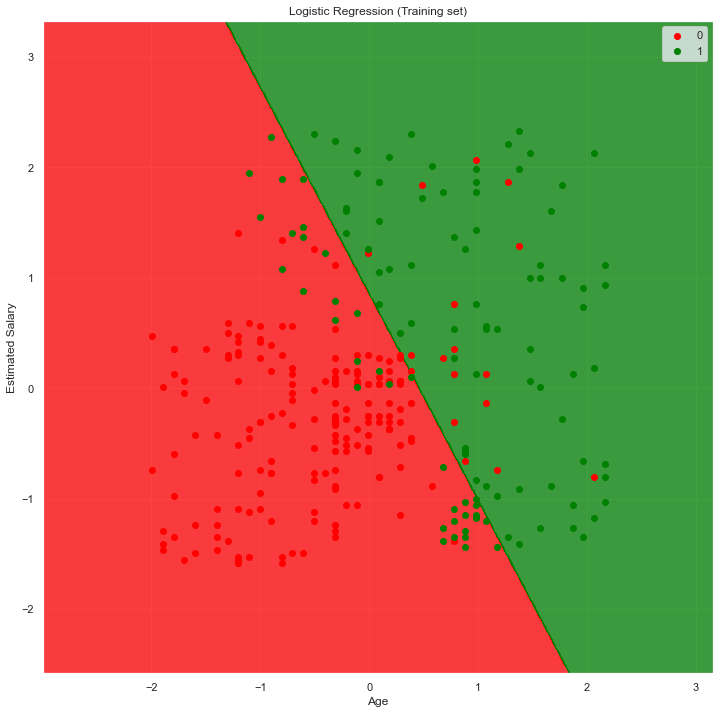

In [ ]:
# visualising train data fit
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(12,12))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


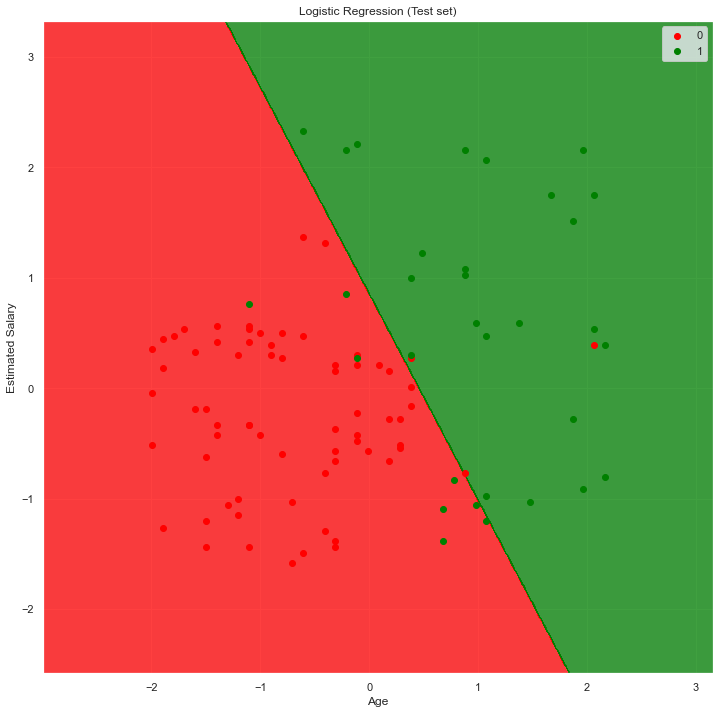

In [ ]:
# visualising test data fit
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(12,12))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 4. Advertising Dataset

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [ ]:
ad_data = pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\advertising.csv')
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Text(0.5, 0, 'Age')

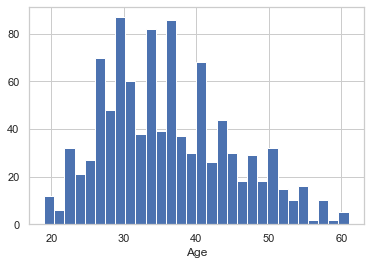

In [ ]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

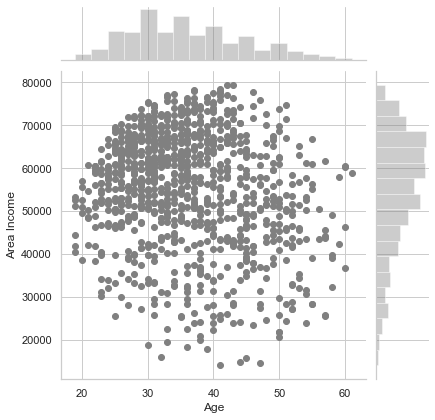

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=ad_data,color='gray')

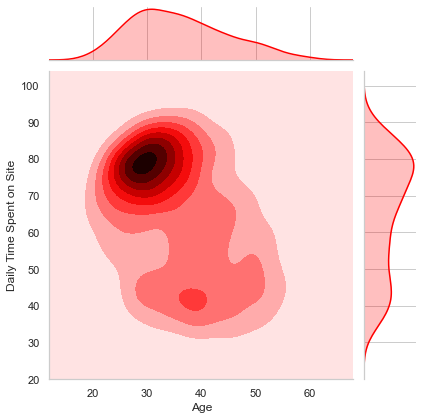

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

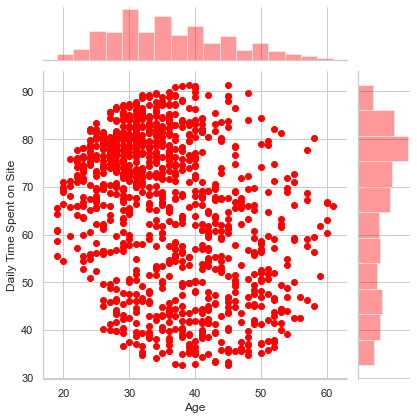

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='scatter');

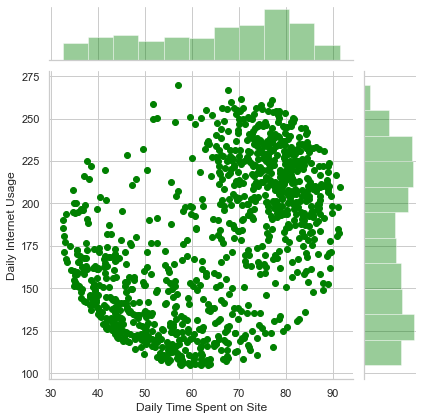

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

In [ ]:
from sklearn.model_selection import train_test_split
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



### 5. Titanic Dataset

In [ ]:
train = pd.read_csv('C:\\Users\\sanjana grover\\Desktop\\RACHITA\\Python\\Data\\titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### MISSING VALUE DETECTION AND EDA

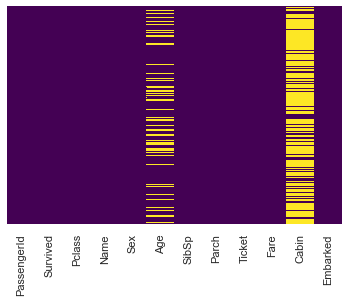

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

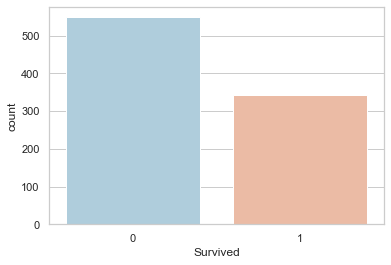

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

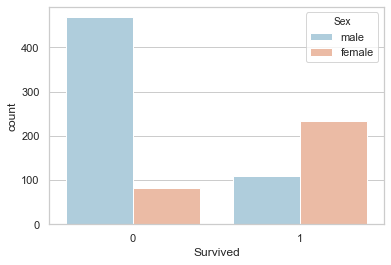

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

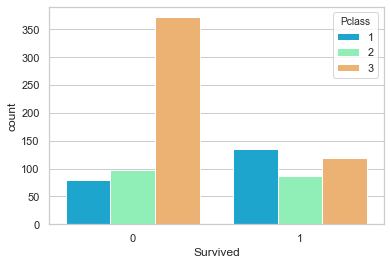

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

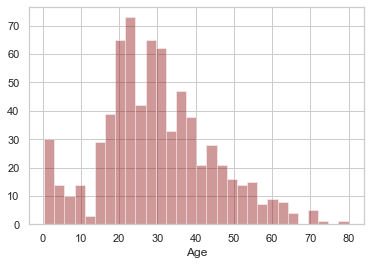

In [ ]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

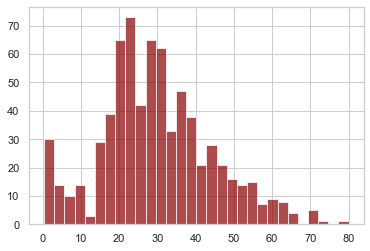

In [ ]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

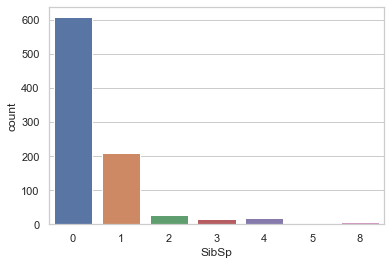

In [ ]:
sns.countplot(x='SibSp',data=train)

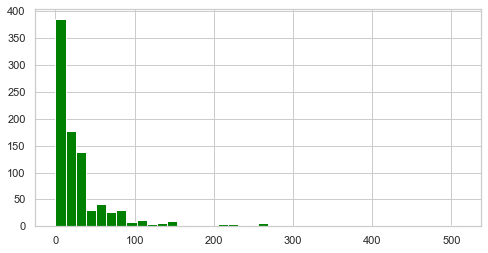

In [ ]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
import cufflinks as cf
cf.go_offline()
train['Fare'].iplot(kind='hist',bins=30,color='green')

### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


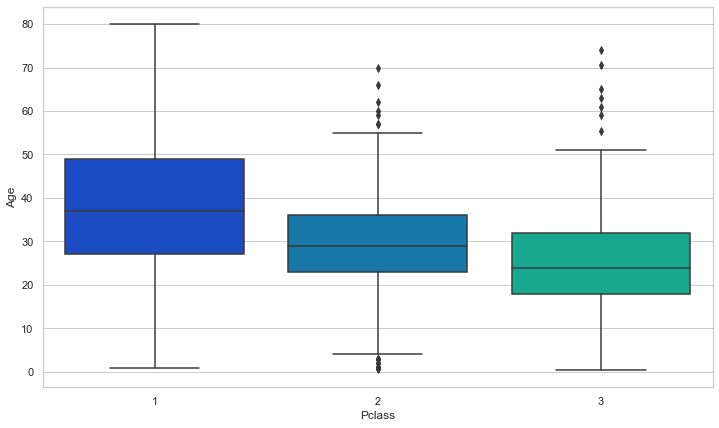

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

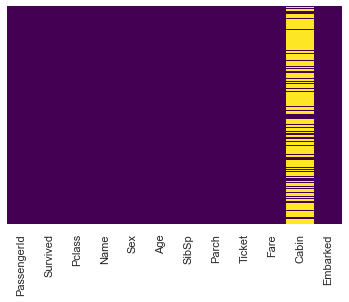

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
train.dropna(inplace=True)

In [ ]:
train.isnull().sum().sum()

0

### Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\sanjana grover\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?